In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Need to decide whether to use normed or un-normed MCMC results
# And what time window for Tohoku

na_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/3comp_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# na_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/3comp_norm_mcmc_arrays/mcmc_results_summary_with_quality.csv')

taiwan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/mcmc_arrays_uncal/mcmc_results_summary_with_quality.csv')
# taiwan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/mcmc_arrays_uncal_norm/mcmc_results_summary_with_quality.csv')

japan_mcmc_results_LONG = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_LONG90s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
japan_mcmc_results_MED = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_MED40s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
japan_mcmc_results_SHORT = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_SHORT13s_mcmc_arrays/mcmc_results_summary_with_quality.csv')

# japan_mcmc_results_LONG = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_LONG90s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_MED = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_MED40s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_SHORT = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_SHORT13s_mcmc_arrays/mcmc_results_summary_with_quality.csv')

na_good_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'g']
na_bad_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'b']

# japan_good_results = japan_mcmc_results_SHORT[japan_mcmc_results_SHORT['two_line_fit_qual'] == 'g']
# japan_bad_results = japan_mcmc_results_SHORT[japan_mcmc_results_SHORT['two_line_fit_qual'] == 'b']
japan_good_results = japan_mcmc_results_MED[japan_mcmc_results_MED['two_line_fit_qual'] == 'g']
japan_bad_results = japan_mcmc_results_MED[japan_mcmc_results_MED['two_line_fit_qual'] == 'b']
# japan_good_results = japan_mcmc_results_LONG[japan_mcmc_results_LONG['two_line_fit_qual'] == 'g']
# japan_bad_results = japan_mcmc_results_LONG[japan_mcmc_results_LONG['two_line_fit_qual'] == 'b']

taiwan_good_results = taiwan_mcmc_results[taiwan_mcmc_results['two_line_fit_qual'] == 'g']
taiwan_bad_results = taiwan_mcmc_results[taiwan_mcmc_results['two_line_fit_qual'] == 'b']

In [4]:
# na_good_results

In [5]:
# Calculate scaling laws, now out to M9 

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,9.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

In [19]:
# Log versions

fig = plt.figure(figsize = (12, 12), dpi = 400)

# mag vs tau
plt.subplot(321)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, np.log10(na_good_results.xinter.values-10), marker = 'o', color = '#355464', alpha = 0.6, label = 'NA low error waveforms', zorder = 3)
plt.scatter(na_bad_results.mag.values, np.log10(na_bad_results.xinter.values-10), marker = 'x', color = 'lightblue', label = 'NA high error waveforms', zorder = 3)
plt.scatter(japan_good_results.mag.values, np.log10(japan_good_results.xinter.values-10), marker = 'o', color = 'magenta', alpha = 0.6, label = 'Japan low error waveforms', zorder = 3)
plt.scatter(japan_bad_results.mag.values, np.log10(japan_bad_results.xinter.values-10), marker = 'x', color = 'pink', label = 'Japan high error waveforms', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, np.log10(taiwan_good_results.xinter.values-10), marker = 'o', color = 'brown', alpha = 0.6, label = 'Taiwan low error waveforms', zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, np.log10(taiwan_bad_results.xinter.values-10), marker = 'x', color = 'orange', label = 'Taiwan high error waveforms', zorder = 3)
# plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
# plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of transition time (s)', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 5.15, y = 1.15, s = '(a)', fontsize = 20)

# hypdist vs tau
plt.subplot(322)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, np.log10(na_good_results.xinter.values-10), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, np.log10(na_bad_results.xinter.values-10), marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, np.log10(japan_good_results.xinter.values-10), marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, np.log10(japan_bad_results.xinter.values-10), marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, np.log10(taiwan_good_results.xinter.values-10), marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, np.log10(taiwan_bad_results.xinter.values-10), marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Log10 of transition time (s)')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -270, y = 1.15, s = '(b)', fontsize = 20)

# mag vs m1
plt.subplot(323)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, np.log10(na_good_results.m1.values), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, np.log10(na_bad_results.m1.values), marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.mag.values, np.log10(japan_good_results.m1.values), marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.mag.values, np.log10(japan_bad_results.m1.values), marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, np.log10(taiwan_good_results.m1.values), marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, np.log10(taiwan_bad_results.m1.values), marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of line 1 slope', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 5.15, y = 1.15, s = '(c)', fontsize = 20)

# hypdist vs m1
plt.subplot(324)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, np.log10(na_good_results.m1.values), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, np.log10(na_bad_results.m1.values), marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, np.log10(japan_good_results.m1.values), marker = 'o', color = 'magenta', zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, np.log10(japan_bad_results.m1.values), marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, np.log10(taiwan_good_results.m1.values), marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, np.log10(taiwan_bad_results.m1.values), marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Log10 of line 1 slope')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -270, y = 1.15, s = '(d)', fontsize = 20)

# mag vs m2
plt.subplot(325)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, np.log10(na_good_results.m2.values), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, np.log10(na_bad_results.m2.values), marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.mag.values, np.log10(japan_good_results.m2.values), marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.mag.values, np.log10(japan_bad_results.m2.values), marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, np.log10(taiwan_good_results.m2.values), marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, np.log10(taiwan_bad_results.m2.values), marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Log10 of line 2 slope', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = 5.15, y = -0.35, s = '(e)', fontsize = 20)

# hypdist vs m2
plt.subplot(326)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, np.log10(na_good_results.m2.values), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, np.log10(na_bad_results.m2.values), marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, np.log10(japan_good_results.m2.values), marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, np.log10(japan_bad_results.m2.values), marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, np.log10(taiwan_good_results.m2.values), marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, np.log10(taiwan_bad_results.m2.values), marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Hypocentral distance (km)', fontsize = 12)
plt.ylabel('Log10 of line 2 slope')
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = -270, y = -0.35, s = '(f)', fontsize = 20)

plt.subplots_adjust(hspace = 0, wspace = 0.23)

fig.legend(bbox_to_anchor = [0.5, 0.05], loc = 'center', ncol = 3, fontsize = 11)

# plt.show();

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/Figure5_options/norm_log_SHORT.jpg', format = 'JPG')
plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/renamed_figs/Figure_5_MED_log.jpg', format = 'JPG')
plt.close();

/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_49367/1384422079.py:39: RuntimeWarning: invalid value encountered in log10
  plt.scatter(na_bad_results.mag.values, np.log10(na_bad_results.m1.values), marker = 'x', color = 'lightblue', zorder = 3)
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_49367/1384422079.py:53: RuntimeWarning: invalid value encountered in log10
  plt.scatter(na_bad_results.hypdist.values, np.log10(na_bad_results.m1.values), marker = 'x', color = 'lightblue', zorder = 3)
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_49367/1384422079.py:66: RuntimeWarning: invalid value encountered in log10
  plt.scatter(na_good_results.mag.values, np.log10(na_good_results.m2.values), marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_49367/1384422079.py:80: RuntimeWarning: invalid value encountered in log10
  plt.scatter(na_good_results.hypdist.values, np.log10(na_good_results.m2.v

In [20]:
# Non-log versions

fig = plt.figure(figsize = (12, 12), dpi = 400)

# mag vs tau
plt.subplot(321)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, na_good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, label = 'NA low error waveforms', zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.xinter.values-10, marker = 'x', color = 'lightblue', label = 'NA high error waveforms', zorder = 3)
plt.scatter(japan_good_results.mag.values, japan_good_results.xinter.values-10, marker = 'o', color = 'magenta', alpha = 0.6, label = 'Japan low error waveforms', zorder = 3)
plt.scatter(japan_bad_results.mag.values, japan_bad_results.xinter.values-10, marker = 'x', color = 'pink', label = 'Japan high error waveforms', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, label = 'Taiwan low error waveforms', zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', label = 'Taiwan high error waveforms', zorder = 3)
# plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
# plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 5.15, y = 14.5, s = '(a)', fontsize = 20)

# hypdist vs tau
plt.subplot(322)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, na_good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, na_bad_results.xinter.values-10, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, japan_good_results.xinter.values-10, marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, japan_bad_results.xinter.values-10, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Transition time tau (s)')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -270, y = 14.5, s = '(b)', fontsize = 20)

# mag vs m1
plt.subplot(323)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, na_good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.m1.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.mag.values, japan_good_results.m1.values, marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.mag.values, japan_bad_results.m1.values, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.m1.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.m1.values, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 5.15, y = 15.5, s = '(c)', fontsize = 20)

# hypdist vs m1
plt.subplot(324)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, na_good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, na_bad_results.m1.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, japan_good_results.m1.values, marker = 'o', color = 'magenta', zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, japan_bad_results.m1.values, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.m1.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.m1.values, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Line 1 slope')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -270, y = 15.5, s = '(d)', fontsize = 20)

# mag vs m2
plt.subplot(325)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, na_good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.m2.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.mag.values, japan_good_results.m2.values, marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.mag.values, japan_bad_results.m2.values, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.m2.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.m2.values, marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Line 2 slope', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = 5.15, y = 0.6, s = '(e)', fontsize = 20)

# hypdist vs m2
plt.subplot(326)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.hypdist.values, na_good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.hypdist.values, na_bad_results.m2.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.hypdist.values, japan_good_results.m2.values, marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.hypdist.values, japan_bad_results.m2.values, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.m2.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.m2.values, marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Hypocentral distance (km)', fontsize = 12)
plt.ylabel('Line 2 slope')
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = -270, y = 0.6, s = '(f)', fontsize = 20)

plt.subplots_adjust(hspace = 0, wspace = 0.23)

fig.legend(bbox_to_anchor = [0.5, 0.05], loc = 'center', ncol = 3, fontsize = 11)

# plt.show();

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/Figure5_options/norm_nonlog_SHORT.jpg', format = 'JPG')
plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/renamed_figs/Figure_5_MED_nonlog.jpg', format = 'JPG')
plt.close();

In [ ]:
na_good_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'g']
na_bad_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'b']

In [17]:
close_na = na_mcmc_results[na_mcmc_results['hypdist'] <= 140]
close_good_na = close_na[close_na['two_line_fit_qual'] == 'g']
close_bad_na = close_na[close_na['two_line_fit_qual'] == 'b']

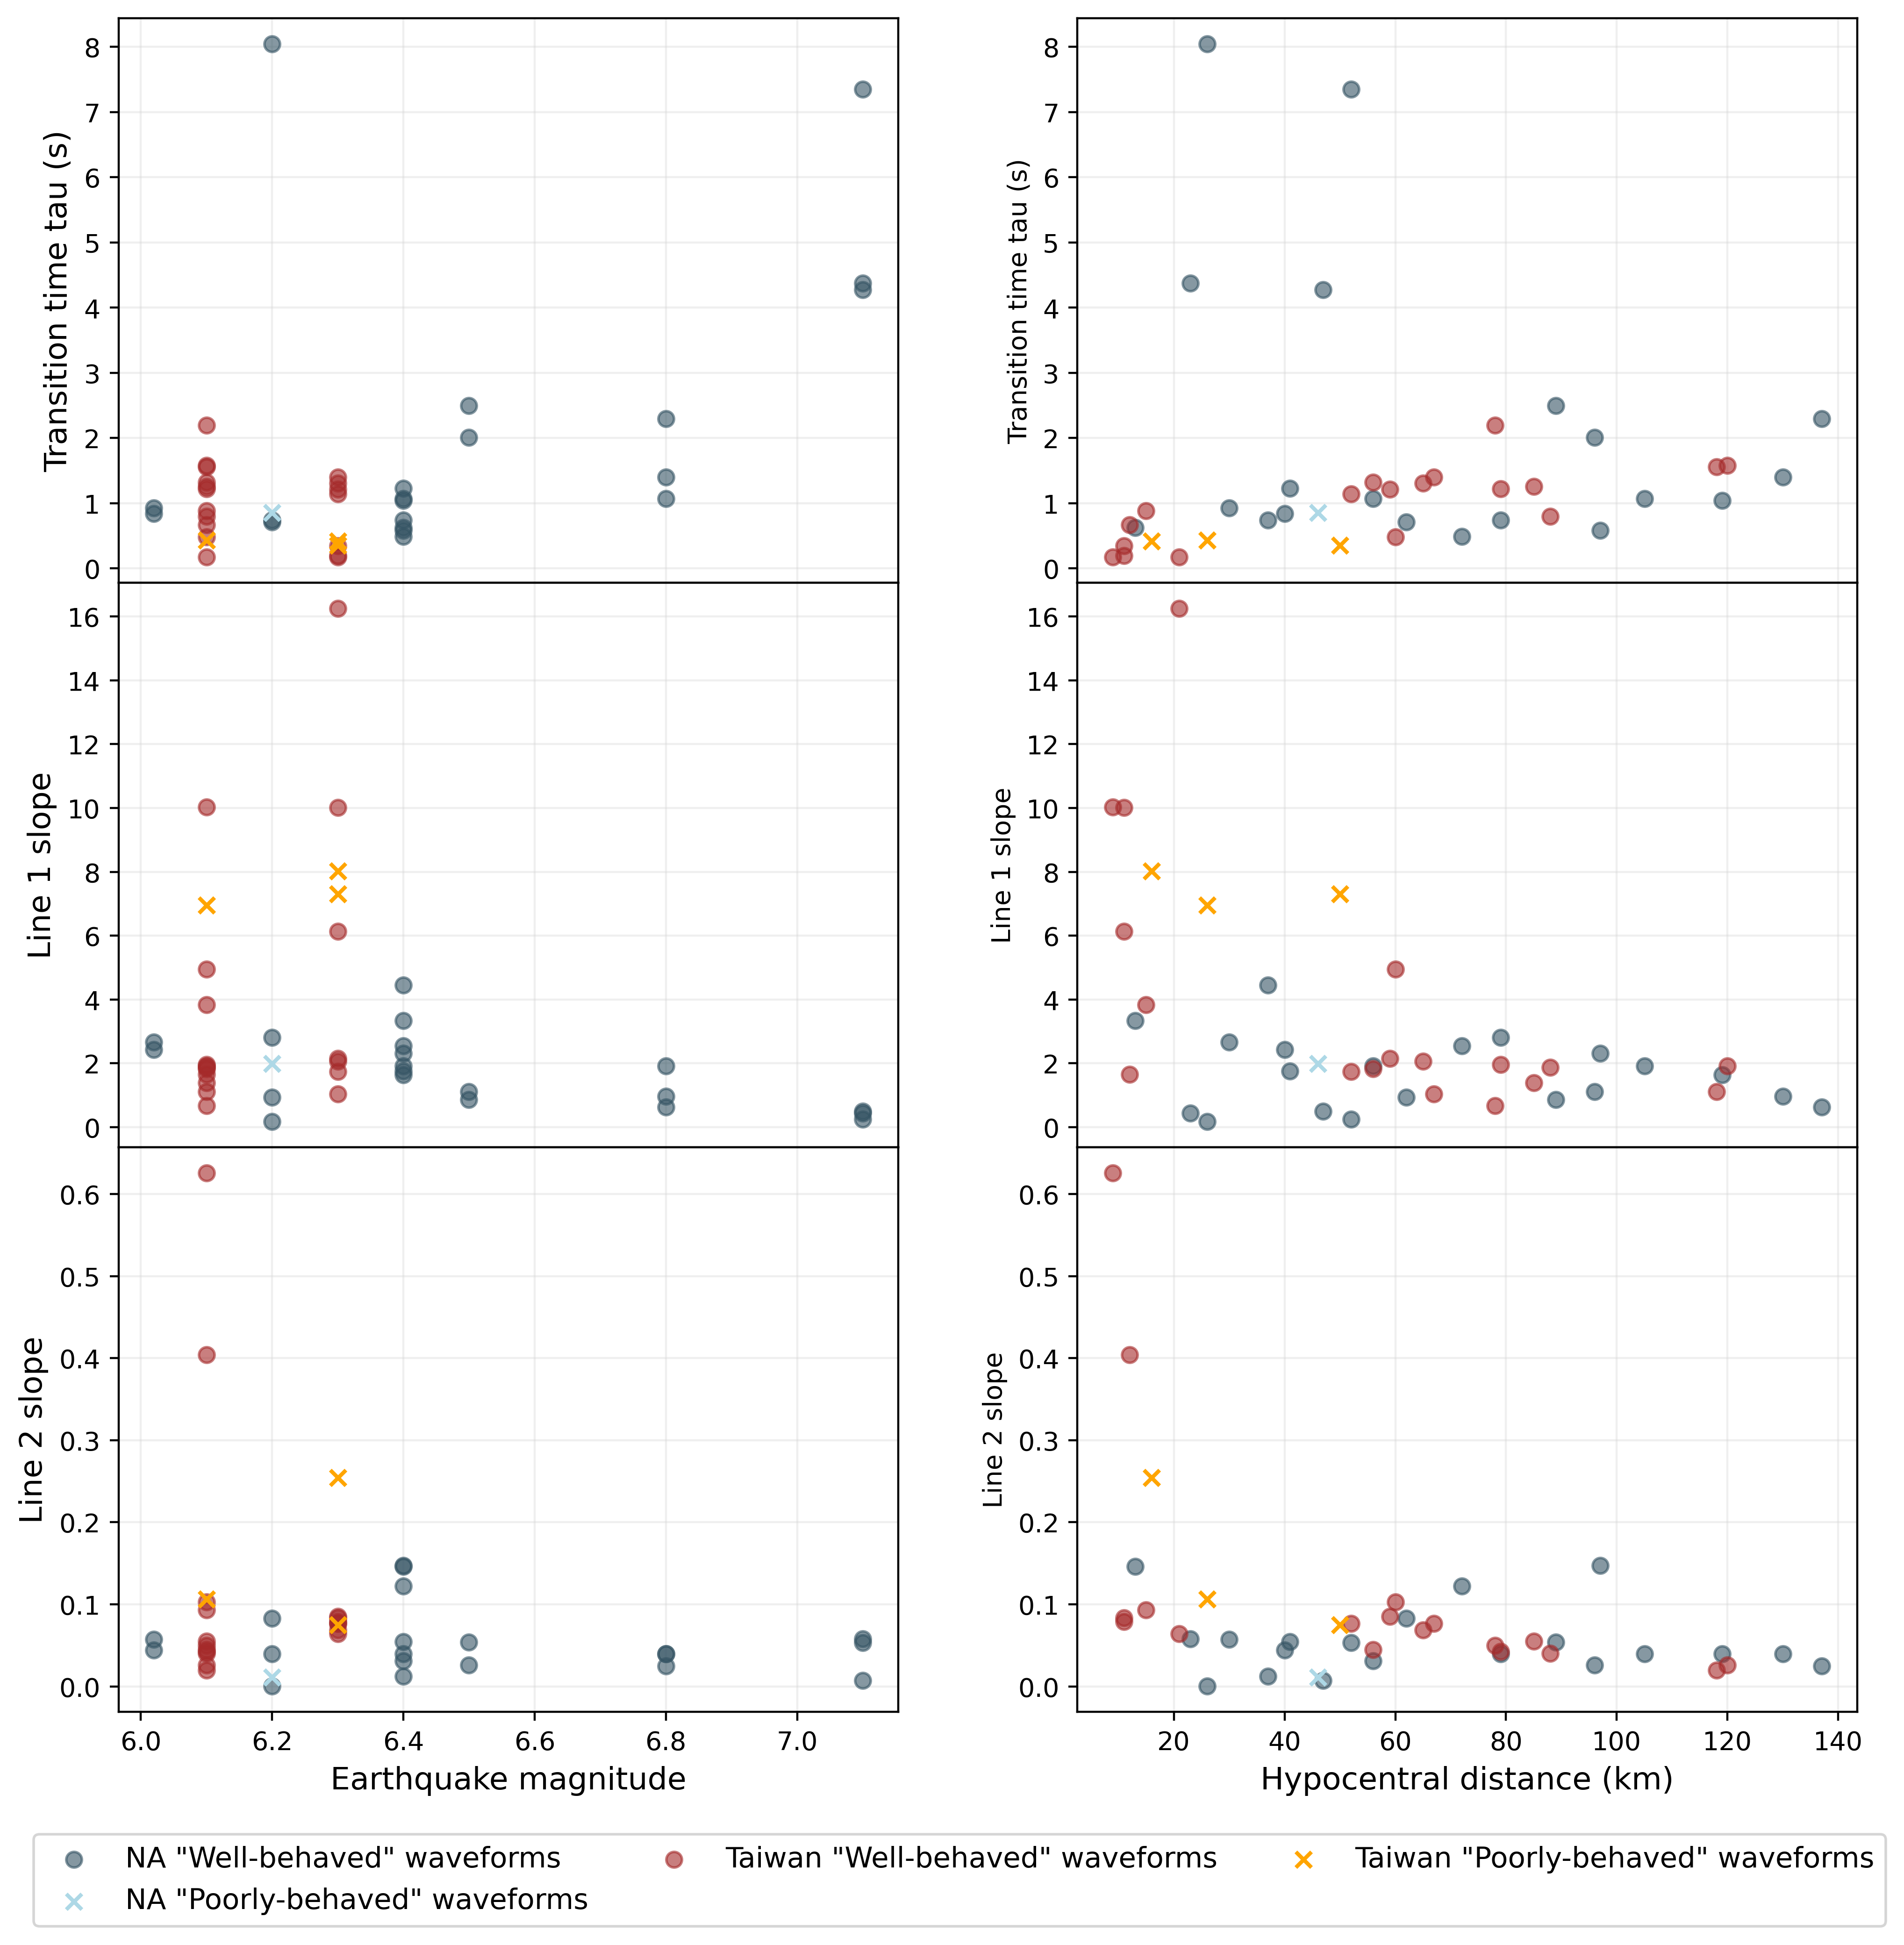

In [ ]:
# Non-log versions

fig = plt.figure(figsize = (12, 12), dpi = 400)

# mag vs tau
plt.subplot(321)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.mag.values, close_good_na.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, label = 'NA "Well-behaved" waveforms', zorder = 3)
plt.scatter(close_bad_na.mag.values, close_bad_na.xinter.values-10, marker = 'x', color = 'lightblue', label = 'NA "Poorly-behaved" waveforms', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, label = 'Taiwan "Well-behaved" waveforms', zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', label = 'Taiwan "Poorly-behaved" waveforms', zorder = 3)
# plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
# plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
# plt.text(x = 5.15, y = 14.5, s = '(a)', fontsize = 20)

# hypdist vs tau
plt.subplot(322)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.hypdist.values, close_good_na.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(close_bad_na.hypdist.values, close_bad_na.xinter.values-10, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Transition time tau (s)')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
# plt.text(x = -270, y = 14.5, s = '(b)', fontsize = 20)

# mag vs m1
plt.subplot(323)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.mag.values, close_good_na.m1.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(close_bad_na.mag.values, close_bad_na.m1.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.m1.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.m1.values, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
# plt.text(x = 5.15, y = 15.5, s = '(c)', fontsize = 20)

# hypdist vs m1
plt.subplot(324)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.hypdist.values, close_good_na.m1.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(close_bad_na.hypdist.values, close_bad_na.m1.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.m1.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.m1.values, marker = 'x', color = 'orange', zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Line 1 slope')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
# plt.text(x = -270, y = 15.5, s = '(d)', fontsize = 20)

# mag vs m2
plt.subplot(325)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.mag.values, close_good_na.m2.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(close_bad_na.mag.values, close_bad_na.m2.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.m2.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.m2.values, marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Line 2 slope', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 10)
# plt.text(x = 5.15, y = 0.6, s = '(e)', fontsize = 20)

# hypdist vs m2
plt.subplot(326)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(close_good_na.hypdist.values, close_good_na.m2.values, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(close_bad_na.hypdist.values, close_bad_na.m2.values, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.hypdist.values, taiwan_good_results.m2.values, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.hypdist.values, taiwan_bad_results.m2.values, marker = 'x', color = 'orange', zorder = 3)
plt.xlabel('Hypocentral distance (km)', fontsize = 12)
plt.ylabel('Line 2 slope')
plt.tick_params(axis = 'both', labelsize = 10)
# plt.text(x = -270, y = 0.6, s = '(f)', fontsize = 20)

plt.subplots_adjust(hspace = 0, wspace = 0.23)

fig.legend(bbox_to_anchor = [0.5, 0.05], loc = 'center', ncol = 3, fontsize = 11)

plt.show();

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/Figure5_options/norm_nonlog_SHORT.jpg', format = 'JPG')
# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/renamed_figs/Figure_5_MED_nonlog.jpg', format = 'JPG')
# plt.close();